In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
# importing library for dealing ipaddress
import ipaddress
from ipaddress import IPv4Address
# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
# representation of model layers
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# NF-UNSW-NB15


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/NF-UNSW-NB15.csv') 
df.drop(df.index[-1],axis=0,inplace=True)

In [ ]:
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623112,59.166.0.3,48121,149.171.126.2,6881,6,0.0,1218,456,10,6,26,0,0,Benign
1623113,59.166.0.2,1640,149.171.126.8,53,17,0.0,130,162,2,2,0,0,0,Benign
1623114,59.166.0.2,3610,149.171.126.6,21,6,1.0,2044,2404,36,34,26,0,0,Benign
1623115,59.166.0.2,4667,149.171.126.6,40725,6,0.0,320,1918,6,8,27,0,0,Benign


In [ ]:
df.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

In [ ]:
df.dtypes

IPV4_SRC_ADDR                  object
L4_SRC_PORT                     int64
IPV4_DST_ADDR                  object
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Label                           int64
Attack                         object
dtype: object

In [ ]:
df.Attack.value_counts()

Benign            1550711
Exploits            24736
Fuzzers             19463
Reconnaissance      12291
Generic              5570
DoS                  5051
Analysis             1995
Backdoor             1782
Shellcode            1365
Worms                 153
Name: Attack, dtype: int64

In [ ]:
  def change_label(df):
#   df.Attack.replace(['DDoS attacks-LOIC-HTTP', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-GoldenEye', 
#                     'DoS attacks-Slowloris', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC'],'Dos',inplace=True)
#   df.Attack.replace(['FTP-BruteForce', 'SSH-Bruteforce', 'Brute Force -Web'],'Probe',inplace=True)
#   df.Attack.replace(['SQL Injection', 'Brute Force -XSS'],'U2R',inplace=True)
    df.Attack.replace(['Benign'],'Normal',inplace=True)
#   df.Attack.replace(['Bot', 'Infilteration'],'R2L',inplace=True)
  change_label(df)
df.Attack.value_counts()

Normal            1550711
Exploits            24736
Fuzzers             19463
Reconnaissance      12291
Generic              5570
DoS                  5051
Analysis             1995
Backdoor             1782
Shellcode            1365
Worms                 153
Name: Attack, dtype: int64

In [ ]:
# df.drop(df.loc[df['Attack']=='Normal'].index[:6900000], axis=0, inplace=True)
# df.drop(df.loc[df['Attack']=='Dos'].index[:520000], axis=0, inplace=True)
# df.drop(df.loc[df['Attack']=='Probe'].index[:100000], axis=0, inplace=True)
# df.drop(df.loc[df['Attack']=='R2L'].index[:30000], axis=0, inplace=True)

In [ ]:
df.Attack.value_counts()

Normal            1550711
Exploits            24736
Fuzzers             19463
Reconnaissance      12291
Generic              5570
DoS                  5051
Analysis             1995
Backdoor             1782
Shellcode            1365
Worms                 153
Name: Attack, dtype: int64

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(", ".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])
analyze(df)


1623117 rows
** IPV4_SRC_ADDR:[59.166.0.5:9.47%, 59.166.0.1:9.45%, 59.166.0.4:9.45%, 59.166.0.2:9.44%, 59.166.0.0:9.42%, 59.166.0.3:9.39%, 59.166.0.9:9.1%, 59.166.0.8:9.06%, 59.166.0.6:9.05%, 59.166.0.7:9.01%, 175.45.176.1:1.83%, 175.45.176.3:1.74%, 175.45.176.0:1.69%, 175.45.176.2:1.61%, 10.40.85.10:0.03%, 10.40.85.1:0.03%, 10.40.182.1:0.03%, 149.171.126.5:0.02%, 149.171.126.1:0.02%, 149.171.126.2:0.02%, 149.171.126.6:0.02%, 149.171.126.8:0.01%, 149.171.126.4:0.01%, 149.171.126.3:0.01%, 149.171.126.9:0.01%, 149.171.126.7:0.01%, 149.171.126.0:0.01%, 149.171.126.18:0.01%, 149.171.126.12:0.01%, 149.171.126.14:0.01%, 149.171.126.15:0.0%, 149.171.126.10:0.0%, 10.40.182.6:0.0%, 149.171.126.13:0.0%, 149.171.126.17:0.0%, 149.171.126.19:0.0%, 192.168.241.243:0.0%, 149.171.126.16:0.0%, 149.171.126.11:0.0%, 127.0.0.1:0.0%]
** L4_SRC_PORT:64586 (3%)
** IPV4_DST_ADDR:[149.171.126.1:9.45%, 149.171.126.4:9.45%, 149.171.126.2:9.45%, 149.171.126.3:9.45%, 149.171.126.5:9.42%, 149.171.126.0:9.38%, 149.

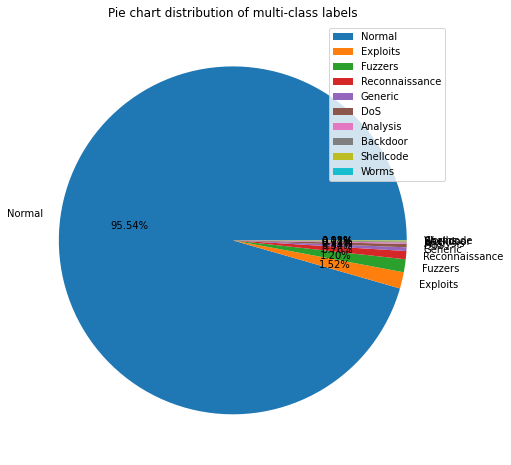

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df.Attack.value_counts(),labels=['Normal', 'Exploits', 'Fuzzers', 'Reconnaissance', 'Generic', 'DoS', 'Analysis','Backdoor', 'Shellcode','Worms',],autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

In [ ]:
def IP_deal(df, len):
    arr1 = df.IPV4_SRC_ADDR; arr2 = df.IPV4_DST_ADDR
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    for i in range(len):
      try:
        arr1[i] = int(ipaddress.IPv4Address(arr1[i]))
        arr2[i] = int(ipaddress.IPv4Address(arr2[i]))
      except:
        print(arr1[i], i)
        print(arr2[i], i)
    df.IPV4_SRC_ADDR = arr1.reshape(len,1)
    df.IPV4_DST_ADDR = arr2.reshape(len,1)
    return df

df = IP_deal(df, df.shape[0])
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,2511044096,62073,1000734725,56082,6,0.0,9672,416,11,8,25,15,0,Normal
1,2511044098,32284,1000734725,1526,6,0.0,1776,104,6,2,25,0,0,Normal
2,2511044096,21,1000734721,21971,6,1.0,1842,1236,26,22,25,1111,0,Normal
3,1000734721,23800,2511044096,46893,6,0.0,528,8824,10,12,27,124,0,Normal
4,1000734725,63062,2511044098,21,6,1.0,1786,2340,32,34,25,1459,0,Normal


In [ ]:
numeric_col = df.select_dtypes(include='number').columns
numeric_col

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [ ]:
df.dtypes

IPV4_SRC_ADDR                  object
L4_SRC_PORT                     int64
IPV4_DST_ADDR                  object
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Label                           int64
Attack                         object
dtype: object

In [ ]:
df.IPV4_SRC_ADDR = pd.to_numeric(df.IPV4_SRC_ADDR)
df.IPV4_DST_ADDR = pd.to_numeric(df.IPV4_DST_ADDR)
df.dtypes

IPV4_SRC_ADDR                   int64
L4_SRC_PORT                     int64
IPV4_DST_ADDR                   int64
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Label                           int64
Attack                         object
dtype: object

In [ ]:

numeric_col = df.select_dtypes(include='number').columns

std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

data = normalization(df.copy(),numeric_col)
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,2.778414,1.533064,-20.329288,2.156946,-0.310688,-0.662235,0.055297,-0.241222,-0.321254,-0.325353,0.491742,-0.114590,-0.216084,Normal
1,2.778414,-0.018623,-20.329288,-0.627423,-0.310688,-0.662235,-0.045403,-0.243001,-0.377538,-0.370978,0.491742,-0.114621,-0.216084,Normal
2,2.778414,-1.699178,-20.329288,0.416026,-0.310688,-0.613741,-0.044561,-0.236548,-0.152404,-0.218896,0.491742,-0.112312,-0.216084,Normal
3,-0.273377,-0.460548,0.022812,1.687967,-0.310688,-0.662235,-0.061319,-0.193292,-0.332511,-0.294937,0.657499,-0.114364,-0.216084,Normal
4,-0.273377,1.584580,0.022812,-0.704234,-0.310688,-0.613741,-0.045275,-0.230254,-0.084864,-0.127647,0.491742,-0.111589,-0.216084,Normal


In [ ]:
  data.shape[1]

14

In [ ]:
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.Attack)

le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#np.save("/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/labels/le2_classes.npy",le2.classes_,allow_pickle=True)

multi_data = pd.get_dummies(multi_data,columns=['Attack'],prefix="",prefix_sep="") 
multi_data['Attack'] = multi_label
multi_data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,...,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms,Attack
0,2.778414,1.533064,-20.329288,2.156946,-0.310688,-0.662235,0.055297,-0.241222,-0.321254,-0.325353,...,0,0,0,0,0,1,0,0,0,Normal
1,2.778414,-0.018623,-20.329288,-0.627423,-0.310688,-0.662235,-0.045403,-0.243001,-0.377538,-0.370978,...,0,0,0,0,0,1,0,0,0,Normal
2,2.778414,-1.699178,-20.329288,0.416026,-0.310688,-0.613741,-0.044561,-0.236548,-0.152404,-0.218896,...,0,0,0,0,0,1,0,0,0,Normal
3,-0.273377,-0.460548,0.022812,1.687967,-0.310688,-0.662235,-0.061319,-0.193292,-0.332511,-0.294937,...,0,0,0,0,0,1,0,0,0,Normal
4,-0.273377,1.584580,0.022812,-0.704234,-0.310688,-0.613741,-0.045275,-0.230254,-0.084864,-0.127647,...,0,0,0,0,0,1,0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623112,-0.273377,0.806315,0.022812,-0.354121,-0.310688,-0.662235,-0.052519,-0.240994,-0.332511,-0.340562,...,0,0,0,0,0,1,0,0,0,Normal
1623113,-0.273377,-1.614846,0.022812,-0.702601,0.567681,-0.662235,-0.066394,-0.242670,-0.422564,-0.370978,...,0,0,0,0,0,1,0,0,0,Normal
1623114,-0.273377,-1.512230,0.022812,-0.704234,-0.310688,-0.613741,-0.041985,-0.229889,-0.039838,-0.127647,...,0,0,0,0,0,1,0,0,0,Normal
1623115,-0.273377,-1.457172,0.022812,1.373172,-0.310688,-0.662235,-0.063971,-0.232660,-0.377538,-0.325353,...,0,0,0,0,0,1,0,0,0,Normal


In [ ]:
multi_data.shape[1]

25

In [ ]:
multi_data.intrusion.value_counts()

6    1550711
3      24736
4      19463
7      12291
5       5570
2       5051
0       1995
1       1782
8       1365
9        153
Name: intrusion, dtype: int64

In [ ]:
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y > 0.1]
highest_corr.sort_values(ascending=True)

<ipython-input-99-2fbbef84d961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_data['intrusion']


PROTOCOL         0.288543
IPV4_SRC_ADDR    0.578110
Label            0.734360
intrusion        1.000000
Name: intrusion, dtype: float64

In [ ]:
multi_data.shape[1]

25

In [ ]:
#numerical_data = multi_data[['L4_SRC_PORT', 'L7_PROTO', 'L4_DST_PORT', 'PROTOCOL', 'FLOW_DURATION_MILLISECONDS']]
#multi_data = numerical_data.join(multi_data[['intrusion', 'R2L', 'Dos', 'Normal', 'Probe', 'U2R', 'Attack']])
# multi_data.rename(columns={'Attack':'Label'}, inplace=True)
multi_data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,...,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms,Attack
0,2.778414,1.533064,-20.329288,2.156946,-0.310688,-0.662235,0.055297,-0.241222,-0.321254,-0.325353,...,0,0,0,0,0,1,0,0,0,Normal
1,2.778414,-0.018623,-20.329288,-0.627423,-0.310688,-0.662235,-0.045403,-0.243001,-0.377538,-0.370978,...,0,0,0,0,0,1,0,0,0,Normal
2,2.778414,-1.699178,-20.329288,0.416026,-0.310688,-0.613741,-0.044561,-0.236548,-0.152404,-0.218896,...,0,0,0,0,0,1,0,0,0,Normal
3,-0.273377,-0.460548,0.022812,1.687967,-0.310688,-0.662235,-0.061319,-0.193292,-0.332511,-0.294937,...,0,0,0,0,0,1,0,0,0,Normal
4,-0.273377,1.584580,0.022812,-0.704234,-0.310688,-0.613741,-0.045275,-0.230254,-0.084864,-0.127647,...,0,0,0,0,0,1,0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623112,-0.273377,0.806315,0.022812,-0.354121,-0.310688,-0.662235,-0.052519,-0.240994,-0.332511,-0.340562,...,0,0,0,0,0,1,0,0,0,Normal
1623113,-0.273377,-1.614846,0.022812,-0.702601,0.567681,-0.662235,-0.066394,-0.242670,-0.422564,-0.370978,...,0,0,0,0,0,1,0,0,0,Normal
1623114,-0.273377,-1.512230,0.022812,-0.704234,-0.310688,-0.613741,-0.041985,-0.229889,-0.039838,-0.127647,...,0,0,0,0,0,1,0,0,0,Normal
1623115,-0.273377,-1.457172,0.022812,1.373172,-0.310688,-0.662235,-0.063971,-0.232660,-0.377538,-0.325353,...,0,0,0,0,0,1,0,0,0,Normal


In [ ]:
# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df)

In [ ]:
 
X_train, X_test = train_test_split(multi_data, test_size=0.25, random_state=42)

y_train = X_train[['Normal','Exploits', 'Fuzzers', 'Reconnaissance', 'Generic', 'DoS', 'Analysis','Backdoor', 'Shellcode','Worms']]
X_train = X_train.drop(['intrusion','Normal', 'Exploits', 'Fuzzers', 'Reconnaissance', 'Generic', 'DoS', 'Analysis','Backdoor', 'Shellcode','Worms', 'Attack'],axis=1)

y_test = X_test[['Normal', 'Exploits', 'Fuzzers', 'Reconnaissance', 'Generic', 'DoS', 'Analysis','Backdoor', 'Shellcode','Worms']]
X_test = X_test.drop(['intrusion','Normal', 'Exploits', 'Fuzzers', 'Reconnaissance', 'Generic', 'DoS', 'Analysis','Backdoor', 'Shellcode','Worms', 'Attack'],axis=1)


In [ ]:
 X_train.shape[0]

1217337

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)

In [ ]:
 y_test.shape[1]

10

In [ ]:
y_test.shape[1]

10

In [ ]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
labels = np.where(df['Label'] == 0, 1, 0)
labels

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
X = multi_data.iloc[:,0:93]
Y = multi_data[['Normal','Exploits', 'Fuzzers', 'Reconnaissance', 'Generic', 'DoS', 'Analysis','Backdoor', 'Shellcode','Worms']]

In [ ]:
# X_train = X_train.values
# X_test = X_test.values
# y_test = y_test.values

In [ ]:
X_train

array([[2.71179403e-01, 7.34813458e-01, 6.52404715e-01, ...,
        8.70967742e-01, 6.88249834e-04, 0.00000000e+00],
       [2.71179404e-01, 3.57045853e-01, 6.52404717e-01, ...,
        8.70967742e-01, 1.62004139e-03, 0.00000000e+00],
       [2.71179405e-01, 7.23094530e-01, 6.52404715e-01, ...,
        8.70967742e-01, 9.99999767e-01, 0.00000000e+00],
       ...,
       [2.71179405e-01, 6.76768139e-01, 6.52404717e-01, ...,
        8.70967742e-01, 9.31325891e-07, 0.00000000e+00],
       [2.71179403e-01, 4.05951019e-01, 6.52404714e-01, ...,
        8.70967742e-01, 9.31325891e-07, 0.00000000e+00],
       [2.71179403e-01, 8.30762188e-01, 6.52404715e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
def get_error_term(v1, v2, _rmse=True):
    if _rmse:
        return np.sqrt(np.mean((v1 - v2) ** 2, axis=1))
    #return MAE
    return np.mean(abs(v1 - v2), axis=1)

In [ ]:
def sample(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [ ]:
original_dim = X_train.shape[1]
input_shape = (original_dim,)
intermediate_dim = int(original_dim / 2)
latent_dim = int(original_dim / 3)

In [ ]:
original_dim

13

In [ ]:
intermediate_dim

6

In [ ]:
latent_dim

4

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
# importing library for dealing ipaddress
import ipaddress
from ipaddress import IPv4Address
# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

In [ ]:
# encoder model

inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
# use the reparameterization trick and get the output from the sample() function
# z = Lambda(sample, output_shape=(1,), name='z')([z_mean, z_log_var])
 
z = Lambda(sample, output_shape=(input_shape,), name='z')([z_mean, z_log_var])
 


encoder = Model(inputs, z, name='encoder')
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 13)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 6)            84          ['encoder_input[0][0]']          
                                                                                                  
 z_mean (Dense)                 (None, 4)            28          ['dense_6[0][0]']                
                                                                                                  
 z_log_var (Dense)              (None, 4)            28          ['dense_6[0][0]']                
                                                                                            

In [ ]:
# # creating model with input, encoding, decoding, output layers
# autoencoder = Model(inputs=inputs, outputs=z)

# # defining loss function, optimizer, metrics and then compiling model
# autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# # summary of model layers
# autoencoder.summary()

In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# # training the model on training dataset
# monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
#                         patience=20, verbose=1, mode='auto',
#                            restore_best_weights=True)
# history = autoencoder.fit(X_train, X_train, epochs=1,batch_size=500,validation_data=(X_test, X_test),callbacks=monitor).history

In [ ]:
# autoencoder.summary()

In [ ]:
# decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)
# Instantiate the decoder model:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 4)]               0         
                                                                 
 dense_7 (Dense)             (None, 6)                 30        
                                                                 
 dense_8 (Dense)             (None, 13)                91        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# full VAE model
outputs = decoder(encoder(inputs))
vae_model = Model(inputs, outputs, name='vae_mlp')

In [ ]:
# the KL loss function:
def vae_loss(x, x_decoded_mean):
    # compute the average MSE error, then scale it up, ie. simply sum on all axes
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean))
    # compute the KL loss
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.square(K.exp(z_log_var)), axis=-1)
    # return the average loss over all 
    total_loss = K.mean(reconstruction_loss + kl_loss)    
    #total_loss = reconstruction_loss + kl_loss
    return total_loss

In [ ]:
X_train 

array([[2.71179403e-01, 7.34813458e-01, 6.52404715e-01, ...,
        8.70967742e-01, 6.88249834e-04, 0.00000000e+00],
       [2.71179404e-01, 3.57045853e-01, 6.52404717e-01, ...,
        8.70967742e-01, 1.62004139e-03, 0.00000000e+00],
       [2.71179405e-01, 7.23094530e-01, 6.52404715e-01, ...,
        8.70967742e-01, 9.99999767e-01, 0.00000000e+00],
       ...,
       [2.71179405e-01, 6.76768139e-01, 6.52404717e-01, ...,
        8.70967742e-01, 9.31325891e-07, 0.00000000e+00],
       [2.71179403e-01, 4.05951019e-01, 6.52404714e-01, ...,
        8.70967742e-01, 9.31325891e-07, 0.00000000e+00],
       [2.71179403e-01, 8.30762188e-01, 6.52404715e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
opt = optimizers.Adam(learning_rate=3e-5, clipvalue=0.5)
#opt = optimizers.RMSprop(learning_rate=0.0001)

vae_model.compile(optimizer=opt, loss=vae_loss,metrics=['accuracy'])
vae_model.summary()
# Finally, we train the model:
results = vae_model.fit(X_train, X_train ,shuffle=True,epochs=10,batch_size=64,validation_data=(X_test, X_test)).history

Model: "vae_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 13)]              0         
                                                                 
 encoder (Functional)        (None, 4)                 140       
                                                                 
 decoder (Functional)        (None, 13)                121       
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
Train on 1217337 samples, validate on 405780 samples
Epoch 1/10
1217337/1217337 [==============================] - ETA: 0s - loss: 70.0415 - accuracy: 0.1386

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1217337/1217337 [==============================] - 38s 31us/sample - loss: 70.0415 - accuracy: 0.1386 - val_loss: 28.7301 - val_accuracy: 0.1843
Epoch 2/10
1217337/1217337 [==============================] - 36s 29us/sample - loss: 25.9423 - accuracy: 0.2957 - val_loss: 22.7146 - val_accuracy: 0.5180
Epoch 3/10
1217337/1217337 [==============================] - 37s 30us/sample - loss: 18.9989 - accuracy: 0.6568 - val_loss: 15.5497 - val_accuracy: 0.7383
Epoch 4/10
1217337/1217337 [==============================] - 36s 30us/sample - loss: 13.6480 - accuracy: 0.7553 - val_loss: 12.3228 - val_accuracy: 0.7638
Epoch 5/10
1217337/1217337 [==============================] - 35s 29us/sample - loss: 11.5961 - accuracy: 0.7698 - val_loss: 11.2156 - val_accuracy: 0.7724
Epoch 6/10
1217337/1217337 [==============================] - 37s 30us/sample - loss: 10.9867 - accuracy: 0.7729 - val_loss: 10.9014 - val_accuracy: 0.7718
Epoch 7/10
1217337/1217337 [==============================] - 36s 29us/samp

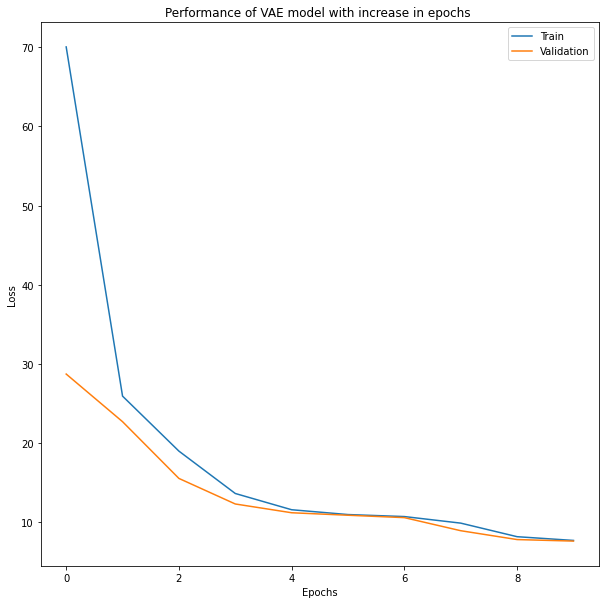

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(vae_model.history.history['loss'])
plt.plot(vae_model.history.history['val_loss'])
plt.title("Performance of VAE model with increase in epochs ")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [ ]:
vae_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = vae_model.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

Test results - Loss: 0.005425818541260126 - Accuracy: 81.15530610084534%


In [ ]:
 predictions = vae_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


# AE Classifier

In [ ]:
 
inputs = Input(shape=predictions.shape[1])
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
z = Lambda(sample, output_shape=(input_shape,), name='z')([z_mean, z_log_var])

encoder1 = Model(inputs, z, name='encoder')
encoder1.summary()
 


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 6)            84          ['input_2[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 4)            28          ['dense_9[0][0]']                
                                                                                                  
 z_log_var (Dense)              (None, 4)            28          ['dense_9[0][0]']                
                                                                                            

In [ ]:

latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(10, activation='sigmoid')(x)
 
decoder1 = Model(latent_inputs, outputs, name='decoder')
decoder1.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 4)]               0         
                                                                 
 dense_12 (Dense)            (None, 6)                 30        
                                                                 
 dense_13 (Dense)            (None, 10)                70        
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# full VAE model
outputs = decoder1(encoder1(inputs))
vae_model1 = Model(inputs, outputs, name='vae_mlp')

In [ ]:

vae_model1.compile(optimizer=opt, loss=vae_loss,metrics=['accuracy'])

his  =  vae_model1.fit(predictions,y_test,shuffle=True,epochs=10,batch_size=64,validation_split=0.2).history

Train on 324624 samples, validate on 81156 samples
Epoch 1/10
324624/324624 [==============================] - 10s 30us/sample - loss: 68.1125 - accuracy: 0.7664 - val_loss: 18.3040 - val_accuracy: 0.9548
Epoch 2/10
324624/324624 [==============================] - 9s 28us/sample - loss: 11.9131 - accuracy: 0.9549 - val_loss: 9.1157 - val_accuracy: 0.9549
Epoch 3/10
324624/324624 [==============================] - 10s 30us/sample - loss: 8.1505 - accuracy: 0.9549 - val_loss: 7.4496 - val_accuracy: 0.9549
Epoch 4/10
324624/324624 [==============================] - 9s 29us/sample - loss: 6.9064 - accuracy: 0.9549 - val_loss: 6.3933 - val_accuracy: 0.9549
Epoch 5/10
324624/324624 [==============================] - 9s 29us/sample - loss: 5.9297 - accuracy: 0.9549 - val_loss: 5.4719 - val_accuracy: 0.9549
Epoch 6/10
324624/324624 [==============================] - 10s 29us/sample - loss: 5.0148 - accuracy: 0.9549 - val_loss: 4.5660 - val_accuracy: 0.9549
Epoch 7/10
324624/324624 [===========

In [ ]:
vae_model1.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = vae_model1.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
 

Test results - Loss: 0.0040264614070522975 - Accuracy: 96.91162705421448%


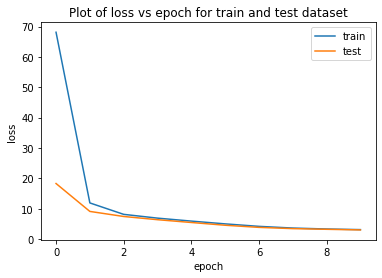

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/plots/ae_classifier_multi_loss.png')
plt.show()

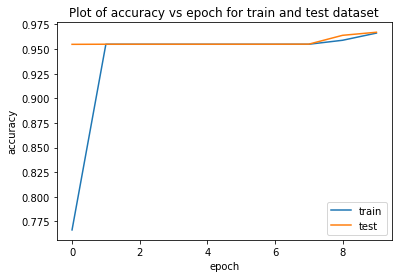

In [ ]:
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/plots/ae_classifier_multi_accuracy.png')
plt.show()

In [ ]:
n_classes = len(le2.classes_)
y_pred = vae_model1.predict(X_test)

In [ ]:
fpr_ae = dict()
tpr_ae = dict()
roc_auc_ae = dict()
for i in range(n_classes):
    fpr_ae[i], tpr_ae[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc_ae[i] = auc(fpr_ae[i], tpr_ae[i])

In [ ]:
for j in range(0,y_pred.shape[1]):
  for i in range(0,y_pred.shape[0]):
    y_pred[i][j] = int(round(y_pred[i][j]))

In [ ]:
print("Recall Score - ",recall_score(y_test,y_pred.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,y_pred.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,y_pred.astype('uint8'),average='micro'))

Recall Score -  0.953647296564641
F1 Score -  0.9761567820232429
Precision Score -  0.9997545638211571


In [ ]:
# import numpy as np


# def plot_confusion_matrix(cm,
#                           target_names,
#                           title='Confusion matrix',
#                           cmap=None,
#                           normalize=True):

#     import matplotlib.pyplot as plt
#     import numpy as np
#     import itertools

#     accuracy = np.trace(cm) / float(np.sum(cm))
#     misclass = 1 - accuracy

#     if cmap is None:
#         cmap = plt.get_cmap('Blues')

#     plt.figure(figsize=(12, 12))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()

#     if target_names is not None:
#         tick_marks = np.arange(len(target_names))
#         plt.xticks(tick_marks, target_names, rotation=45)
#         plt.yticks(tick_marks, target_names)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


#     thresh = cm.max() / 1.5 if normalize else cm.max() / 2
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         if normalize:
#             plt.text(j, i, "{:0.4f}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")
#         else:
#             plt.text(j, i, "{:,}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")


#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#     plt.show()

In [ ]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_pred

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_test 

array([[2.71179405e-01, 7.69451438e-01, 6.52404716e-01, ...,
        8.70967742e-01, 0.00000000e+00, 0.00000000e+00],
       [2.71179404e-01, 9.88174258e-01, 6.52404714e-01, ...,
        8.70967742e-01, 3.25964062e-06, 0.00000000e+00],
       [2.71179404e-01, 1.66308080e-01, 6.52404714e-01, ...,
        8.70967742e-01, 8.87087912e-05, 0.00000000e+00],
       ...,
       [2.71179405e-01, 5.92507820e-01, 6.52404716e-01, ...,
        8.70967742e-01, 8.84759597e-06, 0.00000000e+00],
       [2.71179405e-01, 3.82238499e-01, 6.52404715e-01, ...,
        8.70967742e-01, 5.35512388e-06, 0.00000000e+00],
       [2.71179405e-01, 6.19745174e-01, 6.52404714e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import confusion_matrix
 
# plot_confusion_matrix(cm = confusion_matrix(y_test, y_pred), 
#                       normalize    = False,
#                       target_names = np.unique(y_test),
#                       title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
attack_name = ["normal",'Exploits', 'Fuzzers', 'Reconnaissance', 'Generic', 'DoS', 'Analysis','Backdoor', 'Shellcode','Worms']
print(classification_report(y_test, y_pred, target_names=attack_name, digits=4))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

        normal     0.9998    0.9987    0.9992    387478
      Exploits     0.0000    0.0000    0.0000      6237
       Fuzzers     0.0000    0.0000    0.0000      4914
Reconnaissance     0.0000    0.0000    0.0000      3141
       Generic     0.0000    0.0000    0.0000      1473
           DoS     0.0000    0.0000    0.0000      1233
      Analysis     0.0000    0.0000    0.0000       498
      Backdoor     0.0000    0.0000    0.0000       448
     Shellcode     0.0000    0.0000    0.0000       326
         Worms     0.0000    0.0000    0.0000        32

     micro avg     0.9998    0.9536    0.9762    405780
     macro avg     0.1000    0.0999    0.0999    405780
  weighted avg     0.9547    0.9536    0.9542    405780
   samples avg     0.9536    0.9536    0.9536    405780



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
